# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%2011-%20PCA/python/Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Kernel PCA

In this notebook, we are going to show the application of Kernel PCA when preprocessing the data for a supervised learning model. 

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [146]:
rand_state= 1000

In [147]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Let's work with age and Estimated salary from the feature space.

In [148]:
df= df[['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


###  Logistic regressions  (number of features = 2 for visualization purpose)

Let's work with age and Estimated salary from the feature space.

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [150]:
y = df['Purchased']
X = df.drop('Purchased', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test) # to avoid data leakage we only transform the test set and not fit it. 

In [151]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = rand_state)
logistic.fit(X_train, y_train)

# Predicting the Test set results
y_pred_test = logistic.predict(X_test)

### Applying Kernel PCA

In [152]:
df.shape

(400, 3)

In [153]:
X_train.shape

(320, 2)

In [154]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components =2, kernel = 'rbf') # 'rbf', 'sigmoid', 'poly', 'linear'
train_pca_scores= kpca.fit_transform(X_train) 
test_pca_scores=  kpca.transform(X_test)

In [155]:
train_pca_scores.shape 

(320, 2)

we can find the PVE as below: 

In [156]:
var = np.var(KernelPCA(n_components =400, kernel = 'rbf').fit_transform(X), axis=0) # why should we use 400 components? Gram matrix is 400x400
var / var.sum()

array([0.01102625, 0.00911673, 0.00750067, 0.00661806, 0.00657368,
       0.00631508, 0.006301  , 0.00629174, 0.00626036, 0.00625499,
       0.00625468, 0.00625468, 0.00625468, 0.00624675, 0.00602237,
       0.00527394, 0.00510803, 0.00510712, 0.0050909 , 0.00501871,
       0.00501871, 0.00501855, 0.00501809, 0.00501809, 0.00501809,
       0.00501809, 0.00501809, 0.00501809, 0.00501809, 0.00501809,
       0.00499421, 0.00488778, 0.00476204, 0.00450677, 0.00422677,
       0.00407949, 0.00407442, 0.00407442, 0.00407442, 0.00406379,
       0.00403113, 0.0040311 , 0.00403086, 0.00403086, 0.00403086,
       0.00403086, 0.00403086, 0.00403086, 0.00403086, 0.00403086,
       0.00403086, 0.00403086, 0.00403086, 0.00403086, 0.00403085,
       0.00403065, 0.00402689, 0.00384252, 0.00374162, 0.00313315,
       0.00298968, 0.00298439, 0.00297134, 0.00287622, 0.00284975,
       0.00284951, 0.00284861, 0.00284861, 0.00284861, 0.00284861,
       0.00284861, 0.00284861, 0.00284839, 0.00284713, 0.00281

In [157]:
var.shape

(400,)

In [158]:
var.cumsum()

array([0.0109865 , 0.02007037, 0.027544  , 0.0341382 , 0.04068818,
       0.04698049, 0.05325877, 0.05952784, 0.06576563, 0.07199807,
       0.07823021, 0.08446234, 0.09069448, 0.09691871, 0.10291937,
       0.1081743 , 0.11326391, 0.11835262, 0.12342517, 0.12842578,
       0.1334264 , 0.13842686, 0.14342686, 0.14842686, 0.15342686,
       0.15842686, 0.16342686, 0.16842686, 0.17342686, 0.17842686,
       0.18340307, 0.18827323, 0.1930181 , 0.19750862, 0.20172016,
       0.20578494, 0.20984468, 0.21390441, 0.21796414, 0.22201328,
       0.22602988, 0.23004644, 0.23406277, 0.2380791 , 0.24209542,
       0.24611175, 0.25012807, 0.2541444 , 0.25816073, 0.26217705,
       0.26619338, 0.27020971, 0.27422603, 0.27824236, 0.28225868,
       0.28627481, 0.29028718, 0.29411585, 0.29784399, 0.30096584,
       0.30394474, 0.30691837, 0.309879  , 0.31274485, 0.31558433,
       0.31842356, 0.3212619 , 0.32410024, 0.32693858, 0.32977692,
       0.33261525, 0.33545359, 0.33829171, 0.34112858, 0.34393

In [159]:
train_pca_scores.shape

(320, 2)

In [160]:
# Fitting Logistic Regression to the Training set
logistic.fit(train_pca_scores, y_train)

# Predicting the Test set results
y_PC_pred_test = logistic.predict(test_pca_scores)

### the Confusion Matrix 

In [161]:
from sklearn.metrics import confusion_matrix, classification_report

In [162]:
print(classification_report(y_test, y_PC_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.79      0.69      0.73        32

    accuracy                           0.80        80
   macro avg       0.80      0.78      0.79        80
weighted avg       0.80      0.80      0.80        80



### Let's see the classifiers in two cases:
1. Original space + logistic regression (Linear Classifier)
2. Kernel PC space + logistic regression (Linear classifier)



### 1. Original space + logistic regression (Linear Classifier)

In [163]:
logistic = LogisticRegression(random_state = rand_state)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=1000)

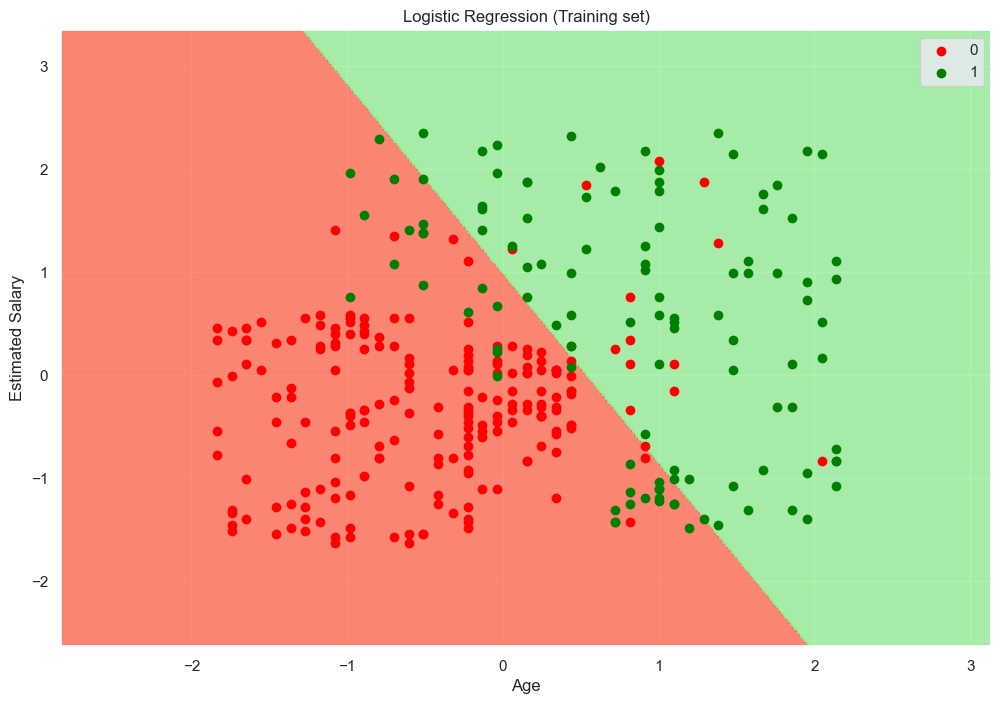

In [164]:
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 2. Kernel PC space + logistic regression (Linear classifier)


In [165]:
kernel_logistic = LogisticRegression(random_state = rand_state)
kernel_logistic.fit(train_pca_scores, y_train)

LogisticRegression(random_state=1000)

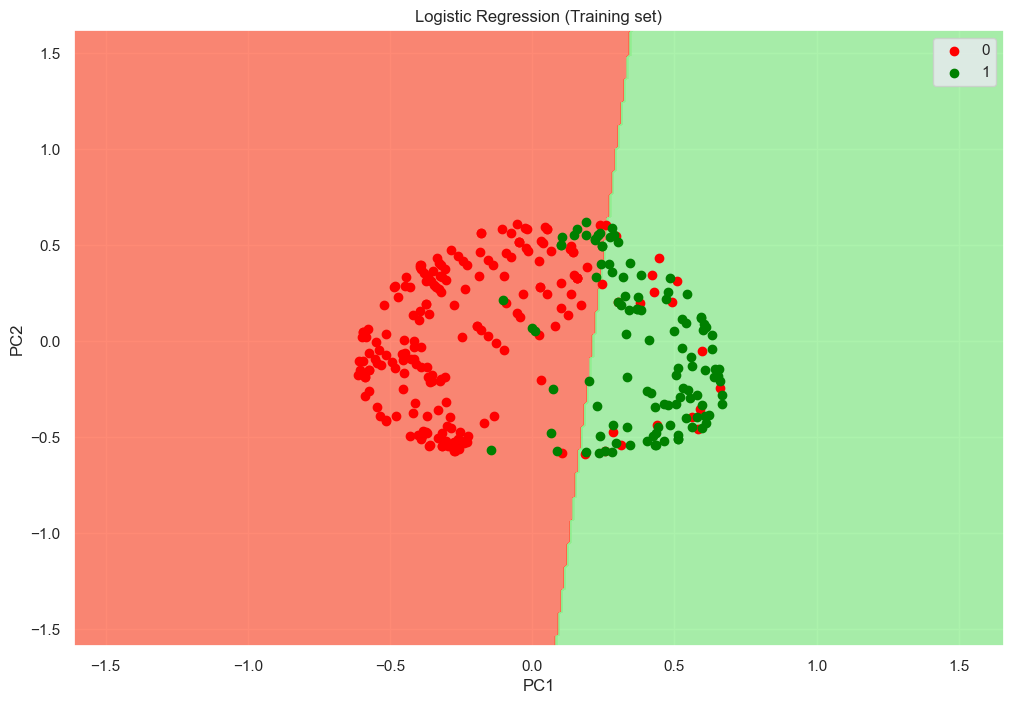

In [166]:
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = train_pca_scores, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, kernel_logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Here, the kernel PCA is finding the most important components of the Gram matrix (400*400) which carry some information about non-linearity of the data. 

### Let's see the performance of the models in the test set! this is what matters. 


In [167]:
print(classification_report(y_test, logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        48
           1       0.87      0.62      0.73        32

    accuracy                           0.81        80
   macro avg       0.83      0.78      0.79        80
weighted avg       0.82      0.81      0.81        80



In [168]:
print(classification_report(y_test, kernel_logistic.predict(test_pca_scores)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.79      0.69      0.73        32

    accuracy                           0.80        80
   macro avg       0.80      0.78      0.79        80
weighted avg       0.80      0.80      0.80        80



**Exercise**: 
1. Go back and use linear kernel. what do you expect?
2. Try poly or sigmoid kernels as well. Any improvements? 

###  Additional links:
1. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. PCA visualization: https://setosa.io/ev/principal-component-analysis/
3. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
4. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
5. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk